In [1]:
import pandas as pd 


In [2]:
# load dataset 
data = pd.read_excel(r"D:\Power BI\sales_data_Power\Superstore Dataset.xlsx")

In [3]:
df =data.copy()  # make a copy of 'data'

In [4]:
data.head(2) 

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,219.5820


In [7]:
data = data[['Order Date', 'Sales', 'Profit']]

In [8]:
data.head(2)

,Order Date,Sales,Profit
0,2019-11-08,261.96,41.9136
1,2019-11-08,731.94,219.5820


In [9]:
data.sort_values(by='Order Date', inplace=True)

In [10]:
data.head(2)

,Order Date,Sales,Profit
2861,2019-01-02,173.94,38.2668
2862,2019-01-02,231.98,67.2742


In [11]:
data.set_index('Order Date', inplace=True) # make 'date' table as index

In [12]:
data.head(2)

,Sales,Profit
Order Date,,
2019-01-02,173.94,38.2668
2019-01-02,231.98,67.2742


<h1> <b> Rolling Windows </b> </h1> 

In [ ]:
# .rolling() 
# windowssize() 
#agg() 

In [15]:
data['Sales_roll'] = data['Sales'].rolling(windows=10).sum()

TypeError: NDFrame.rolling() got an unexpected keyword argument 'windows'. Did you mean 'window'?

In [19]:
data.rolling(window=10).sum()

,Sales,Profit
Order Date,,
2019-01-02,NaN,NaN
2019-01-02,NaN,NaN
2019-01-03,NaN,NaN
2019-01-03,NaN,NaN
2019-01-03,NaN,NaN
...,...,...
2020-12-30,1200.614,331.0447
2020-12-30,1201.734,327.9157
2020-12-30,1222.494,317.3551


In [20]:
data

,Sales,Profit
Order Date,,
2019-01-02,173.940,38.2668
2019-01-02,231.980,67.2742
2019-01-03,11.880,5.3460
2019-01-03,114.460,28.6150
2019-01-03,1592.850,350.4270
...,...,...
2020-12-30,13.904,4.5188
2020-12-30,20.720,6.4750
2020-12-30,323.136,12.1176


In [21]:
data['rolling_sales_mean'] = data['Sales'].rolling(window=3).mean()

In [22]:
data

,Sales,Profit,rolling_sales_mean
Order Date,,,
2019-01-02,173.940,38.2668,NaN
2019-01-02,231.980,67.2742,NaN
2019-01-03,11.880,5.3460,139.266667
2019-01-03,114.460,28.6150,119.440000
2019-01-03,1592.850,350.4270,573.063333
...,...,...,...
2020-12-30,13.904,4.5188,75.409333
2020-12-30,20.720,6.4750,81.308000
2020-12-30,323.136,12.1176,119.253333


In [25]:
# rolling sum 
data['rolling_sum'] = data['Sales'].rolling(window=4).sum()

In [26]:
data

,Sales,Profit,rolling_sales_mean,rolling_sum
Order Date,,,,
2019-01-02,173.940,38.2668,NaN,NaN
2019-01-02,231.980,67.2742,NaN,NaN
2019-01-03,11.880,5.3460,139.266667,NaN
2019-01-03,114.460,28.6150,119.440000,532.260
2019-01-03,1592.850,350.4270,573.063333,1951.170
...,...,...,...,...
2020-12-30,13.904,4.5188,75.409333,260.808
2020-12-30,20.720,6.4750,81.308000,246.948
2020-12-30,323.136,12.1176,119.253333,567.060


In [ ]:
x
y
z
x1
x2  (x2+x1+z)
x3  (x1+x2+x3)
xy  (x2+x3+xy)

# Daily basis , window =3 , therr days 
# Weekly basis windows =3, three weeks 
# Quaterly window = 3, quater
year 

In [30]:
# Every three 'rolling' 
data['profit_roll'] = data['Profit'].rolling(window=5).sum()

In [31]:
data.head(10)

,Sales,Profit,rolling_sales_mean,rolling_sum,profit_roll
Order Date,,,,,
2019-01-02,173.940,38.2668,NaN,NaN,NaN
2019-01-02,231.980,67.2742,NaN,NaN,NaN
2019-01-03,11.880,5.3460,139.266667,NaN,NaN
2019-01-03,114.460,28.6150,119.440000,532.260,NaN
2019-01-03,1592.850,350.4270,573.063333,1951.170,489.9290
2019-01-03,180.960,13.5720,629.423333,1900.150,465.2342
2019-01-03,165.600,-6.2100,646.470000,2053.870,391.7500
2019-01-03,30.080,-5.2640,125.546667,1969.490,381.1400
2019-01-04,104.580,-80.1780,100.086667,481.220,272.3470


<h1><b> Basic Stats </b> </h1> 

In [32]:
# mean() : average value 
data['Sales'].mean() 

np.float64(227.56752893710794)

In [33]:
# median() 
data['Sales'].median() 

np.float64(53.42400000000001)

In [35]:
# mode() : 
data['Sales'].mode()

0    12.96
Name: Sales, dtype: float64

In [36]:
# Measures of Dispersicon 
# variance() 
data['Sales'].var()

np.float64(388111.35189058044)

In [37]:
# Standard Deviation (std) 
data['Sales'].std()

np.float64(622.985836027257)

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<Axes: xlabel='Sales', ylabel='Density'>

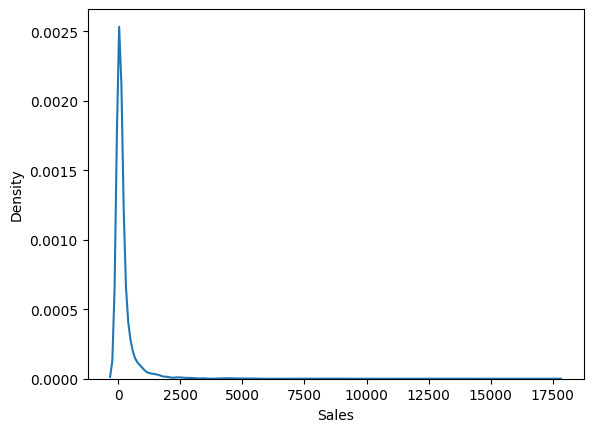

In [39]:
sns.kdeplot(x='Sales', data=data)

<Axes: ylabel='Sales'>

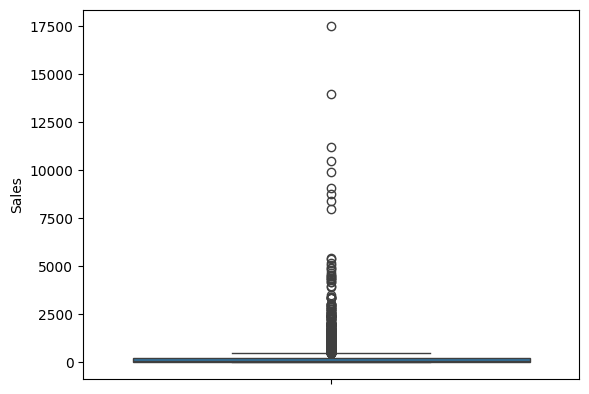

In [41]:
sns.boxplot(y='Sales', data=data)

In [44]:
df_x = data[data['Sales']<=500]
df_x

,Sales,Profit,rolling_sales_mean,rolling_sum,profit_roll
Order Date,,,,,
2019-01-02,173.940,38.2668,NaN,NaN,NaN
2019-01-02,231.980,67.2742,NaN,NaN,NaN
2019-01-03,11.880,5.3460,139.266667,NaN,NaN
2019-01-03,114.460,28.6150,119.440000,532.260,NaN
2019-01-03,180.960,13.5720,629.423333,1900.150,465.2342
...,...,...,...,...,...
2020-12-30,13.904,4.5188,75.409333,260.808,171.1092
2020-12-30,20.720,6.4750,81.308000,246.948,76.9282
2020-12-30,323.136,12.1176,119.253333,567.060,79.0176


<Axes: xlabel='Sales', ylabel='Density'>

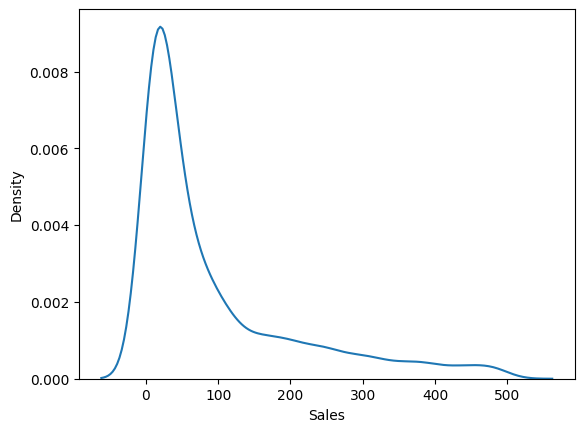

In [45]:
sns.kdeplot(x='Sales', data=df_x)

In [ ]:
# Example : 
1000 2 Bi
200 Exterme Rich {analysi}
300  Exterem pO {ana;y
500 {analysis}

In [46]:
# quantiles () get percentiles 
# 1st quartile of 'Sales' , 0.25 percentil 
data['Sales'].quantile(0.25)

np.float64(17.476)

In [47]:
data['Sales'].quantile(0.5) # returns second quartile 

np.float64(53.42400000000001)

In [48]:
data['Sales'].quantile(0.75) # returns third quartile 


np.float64(206.0496)

In [49]:
# Reload the data 
df.head(2)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,219.5820


In [52]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [53]:
df['Category'].value_counts()

Category
Office Supplies    3568
Furniture          1248
Technology         1083
Name: count, dtype: int64

In [55]:
# total product sold
df['Quantity'].sum()

np.int64(22313)

In [ ]:
# What will be the probabily of getting an item 'Furniture' drawn randomly 
total_furniture_sold / total_items_sold 

In [57]:
(1248 / 22313 )*100

5.593151974185452

In [58]:
df.shape

(5899, 19)

In [60]:
# Randomly selecting a trna, what will be the prob. of reginong = 'South' 
df.Region.value_counts()

Region
West       1900
East       1687
Central    1381
South       931
Name: count, dtype: int64

In [61]:
df.size

112081

In [63]:
df

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [64]:
df[['Category','Quantity']]

,Category,Quantity
0,Furniture,2
1,Furniture,3
2,Office Supplies,2
3,Office Supplies,3
4,Office Supplies,3
...,...,...
5894,Technology,5
5895,Furniture,2
5896,Technology,2
5897,Office Supplies,4


In [66]:
df.groupby('Category')['Quantity'].sum()

Category
Furniture           4630
Office Supplies    13622
Technology          4061
Name: Quantity, dtype: int64

In [67]:
total_sold = df['Quantity'].sum()
total_sold

np.int64(22313)

In [71]:
4630 / 22313

0.20750235288845068

In [70]:
# office s
13622 / total_sold

np.float64(0.6104961233361718)

In [72]:
# what will be the prob of reginon 'South' if a trans, randmly selected 
df

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [73]:
df['Region'].value_counts()

Region
West       1900
East       1687
Central    1381
South       931
Name: count, dtype: int64

In [74]:
df.shape

(5899, 19)

In [75]:
931 / 5899

0.15782335989150703

In [76]:
df.loc[931]['Region']

'South'

In [77]:
df.iloc[171]['Region']

'East'

In [ ]:
# Hypotheticl (Annot, T-test) 

In [78]:
df

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [81]:
# Office Items sales is more in wester region 
df.groupby(['Region','Category']).sum()

TypeError: datetime64 type does not support sum operations

In [82]:
df.head(2)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,219.5820


In [85]:
df.groupby(['Region','Category'])['Profit'].sum()

Region   Category       
Central  Furniture          -1534.7880
         Office Supplies     6477.6297
         Technology         22507.1654
East     Furniture           3593.2371
         Office Supplies    23248.6104
         Technology         26530.3100
South    Furniture           2562.0203
         Office Supplies    11104.9759
         Technology         12884.7201
West     Furniture           5357.8750
         Office Supplies    33966.6349
         Technology         28536.0531
Name: Profit, dtype: float64

In [ ]:
# Yes, the west region has highest sales of office items.

In [ ]:
# Null Hypothesis 
# Alternative } { 

In [86]:
df.head(2)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,219.5820


In [88]:
data=df.copy() 

In [89]:
# Count the number of unique customer 
data['Customer Name'].nunique()

773

In [90]:
# Most Frequent Customer 
data['Customer Name'].value_counts()

Customer Name
Emily Phan        27
Edward Hooks      25
Paul Prost        25
Seth Vernon       25
Pete Kriz         24
                  ..
Barry Weirich      1
Nathan Mautz       1
Michael Oakman     1
Melanie Seite      1
Brad Thomas        1
Name: count, Length: 773, dtype: int64

In [97]:
# Most Revenue Generating Customer 
data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

Customer Name
Tamara Chand          18344.052
Raymond Buch          15117.339
Tom Ashbrook          13807.770
Adrian Barton         12694.909
Christopher Conant    12129.072
                        ...    
Neil Französisch         11.416
Astrea Jones             10.640
Pierre Wener             10.086
Lela Donovan              5.304
Thais Sissman             2.808
Name: Sales, Length: 773, dtype: float64

In [98]:
data['Customer Name'].mode()

0    Emily Phan
Name: Customer Name, dtype: object

In [ ]:
# Customer from south region buys in large amounter 

In [99]:
data.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [100]:
data.State.nunique()

49

In [102]:
data.groupby('State')['Sales'].sum().sort_values(ascending=False)

State
California              277940.2560
New York                165767.0970
Washington               85354.1800
Texas                    85107.9102
Pennsylvania             75754.9500
Michigan                 53253.6840
Ohio                     48012.8600
Illinois                 45385.3300
Indiana                  43978.2300
Florida                  40047.9990
North Carolina           38424.1250
Virginia                 34291.2500
Georgia                  33217.6900
New Jersey               27466.9420
Colorado                 20966.5540
Kentucky                 20637.7300
Tennessee                19244.3170
Wisconsin                18905.0900
Arizona                  17375.5560
Rhode Island             16512.7100
Delaware                 16474.7030
Oklahoma                 14235.7000
Maryland                 14161.1630
Missouri                 13571.9100
Nevada                   12219.4300
Massachusetts            12108.3400
Alabama                   9479.5800
Connecticut           

In [ ]:
1000 
ram 500
shay 500 
0 ram 
1 shaym 


In [ ]:
# 